# Linear Algebra Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1: Logistic Regression
### 1.1: Visualizing:

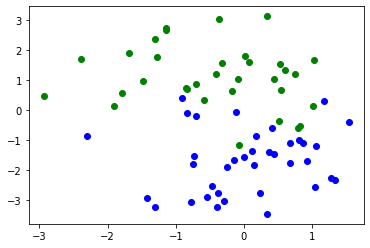

In [2]:
# # visualizing 2d data
# raw_data = np.load('../Data/data2d.npz')
# X = raw_data['X']
# Y = np.array(raw_data['y'])

# z = X[Y == 1]
# plt.plot(z[:, 0], z[:, 1], 'bo')
# z = X[Y == 0]
# plt.plot(z[:, 0], z[:, 1], 'go')
# plt.show()

# visualizing 5d data
raw_data = np.load('../Data/data5d.npz')
X = raw_data['X']
Y = np.array(raw_data['y'])

z = X[Y == 1]
plt.plot(z[:, 0], z[:, 1], 'bo')
z = X[Y == 0]
plt.plot(z[:, 0], z[:, 1], 'go')
plt.show()

### 1.2: Computing Gradient
ax barge

### 1.3: Implementing Model and Gradient:

In [3]:
print("Pre:")
print(X.shape)
print(Y.shape)
#Reshape Data:
X = X.T
Y = Y.reshape(1, Y.shape[0])
print("Reshaped:")
print(X.shape)
print(Y.shape)

Pre:
(70, 5)
(70,)
Reshaped:
(5, 70)
(1, 70)


In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def Phi(X, w, b):
    return sigmoid(np.dot(w.T, X)+b)

def C(w,b, data):
    X, Y = data
    A = Phi(X, w, b)
#     print(A)
    return -1*np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

def compute_dC_dw(w,b, data):
    X, Y = data
    A = Phi(X, w, b)
    return np.dot(X, (A-Y).T)
    
def compute_dC_db(w,b, data):
    X, Y = data
    A = Phi(X, w, b)
    return np.sum(A-Y)

In [5]:
def compute_dC_dw_numeric(w,b, data, epsilon=1e-7):
    C_plus = np.zeros((w.shape[0], 1))
    C_minus = np.zeros((w.shape[0], 1))
    for i in range (w.shape[0]):
        theta_plus = np.copy(w)
        theta_plus[i] = theta_plus[i] + epsilon
        C_plus[i] = C(theta_plus, b, data)
        theta_minus = np.copy(w)
        theta_minus[i] = theta_minus[i] - epsilon
        C_minus[i] = C(theta_minus, b, data)
    return (C_plus-C_minus)/(2*epsilon)

def compute_dC_db_numeric(w,b, data, epsilon=1e-7):
    theta_plus = b + epsilon
    C_plus = C(w, theta_plus, data)
    theta_minus = b - epsilon
    C_minus = C(w, theta_minus, data)
    return (C_plus-C_minus)/(2*epsilon)

In [6]:
# raw_data = np.load('../Data/data5d.npz')
# X = raw_data['X']
# y = raw_data['y']
data = (X,Y)

w = np.random.randn(5,1)
b = np.random.randn(1)

dC_dw = compute_dC_dw(w,b, data)
dC_db = compute_dC_db(w,b, data)

dC_dw_n = compute_dC_dw_numeric(w,b, data)
dC_db_n = compute_dC_db_numeric(w,b, data)

absolute_error_w = np.linalg.norm(dC_dw-dC_dw_n) # absolute error
relative_error_w = np.linalg.norm(dC_dw-dC_dw_n)/np.linalg.norm(dC_dw) # relative error

print(absolute_error_w)
print(relative_error_w)

absolute_error_b = dC_db - dC_db_n # absolute error
relative_error_b = (dC_db - dC_db_n)/dC_db # relative error

print(absolute_error_b)
print(relative_error_b)


1.1943716780544245e-06
1.008446077724735e-08
-3.574372113845925e-07
1.1754053899205115e-07


### 1.4 Implement Gradient Descent

In [9]:
lamda = 0.01
thrsh = 0.1

w = np.zeros((5, 1))
b = 0

while True:
    cost = C(w, b, data)
    print(cost)
    dC_dw = compute_dC_dw(w,b, data)
    dC_db = compute_dC_db(w,b, data)
    if (np.linalg.norm(dC_dw) < thrsh and np.linalg.norm(dC_db) < thrsh):
        break
    w = w - lamda * dC_dw
    b = b - lamda * dC_db

48.52030263919618
11.391212467574762
8.585424734368404
7.110775712025341
6.17026807130682
5.50654436395112
5.007501643432317
4.615511269326678
4.297571422420195
4.033276028425048
3.809258532002283
3.616360052525894
3.448073272418976
3.2996348574611605
3.1674698410559987
3.0488375050371737
2.941597872463589
2.8440531769112054
2.754837478579353
2.6728380840042982
2.5971385012716017
2.526976301499523
2.46171150207555
2.4008025085103646
2.343787573133047
2.290270338816923
2.2399084475257367
2.1924044760848043
2.1474986587403855
2.1049629956338056
2.0645964464463535
2.026220981206739
1.9896783137013856
1.9548271826261903
1.9215410754001123
1.889706312112277
1.8592204243009585
1.8299907765300405
1.801933389025857
1.774971927687788
1.7490368341230371
1.7240645733771511
1.6999969810345419
1.6767806945728938
1.65436665644335
1.6327096784460395
1.611768058679452
1.5915032437408998
1.5718795300056148
1.5528637987618419
1.5344252807672247
1.5165353464476337
1.4991673185079337
1.4822963041840778
1.

0.34939334582797366
0.3487972052419524
0.348203239376432
0.3476114358802432
0.34702178249806476
0.3464342670694792
0.3458488775280354
0.34526560190032773
0.3446844283050778
0.34410534495224016
0.343528340142111
0.34295340226443716
0.34238051979756023
0.3418096813075547
0.341240875447364
0.340674090955981
0.3401093166576073
0.3395465414608316
0.338985754357828
0.3384269444235491
0.33787010081493274
0.33731521277012516
0.33676226960770966
0.3362112607259288
0.3356621756019448
0.33511500379108383
0.33456973492610076
0.33402635871645003
0.33348486494755947
0.3329452434801241
0.3324074842493954
0.33187157726449185
0.33133751260769745
0.33080528043379553
0.33027487096938046
0.3297462745122057
0.3292194814305125
0.32869448216239106
0.3281712672151244
0.3276498271645653
0.3271301526544928
0.32661223439600223
0.32609606316688344
0.3255816298110108
0.32506892523774544
0.3245579404213401
0.32404866640034485
0.32354109427703215
0.32303521521681766
0.3225310204476901
0.32202850125964755
0.321527649

0.17322787517235572
0.17309192153242772
0.1729561898236896
0.17282067949124794
0.1726853899820849
0.1725503207450497
0.17241547123085044
0.17228084089205142
0.17214642918305434
0.17201223556010165
0.1718782594812635
0.17174450040642808
0.17161095779729837
0.17147763111738512
0.17134451983198937
0.17121162340820784
0.17107894131491985
0.17094647302277544
0.17081421800419544
0.17068217573335798
0.17055034568619434
0.170418727340384
0.1702873201753394
0.1701561236722069
0.1700251373138531
0.16989436058486027
0.16976379297152738
0.16963343396184277
0.16950328304549914
0.16937333971387108
0.16924360346001455
0.1691140737786605
0.16898475016620587
0.1688556321207042
0.1687267191418667
0.16859801073104536
0.16846950639123198
0.1683412056270549
0.16821310794476113
0.16808521285222053
0.16795751985891372
0.16783002847592465
0.16770273821593953
0.16757564859323204
0.1674487591236658
0.1673220693246817
0.1671955787152895
0.1670692868160697
0.16694319314915945
0.16681729723824967
0.166691598608578